# Analyzing Crime in Los Angeles

In this project, I analyze crime data for Los Angeles, California to identify patterns in criminal behavior. Specifically, I explore where and when crime often occurs. I also identify the commonest type(s) of crime committed.

The idea and dataset for this project are from [this DataCamp project](https://app.datacamp.com/learn/projects/1876).

A summary of the features in the dataset is given in [this data dictionary](data_dictionary.ipynb).

## Load and inspect data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load and inspect data
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
print(crimes.info())
crimes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
DR_NO           185715 non-null int64
Date Rptd       185715 non-null datetime64[ns]
DATE OCC        185715 non-null datetime64[ns]
TIME OCC        185715 non-null object
AREA NAME       185715 non-null object
Crm Cd Desc     185715 non-null object
Vict Age        185715 non-null int64
Vict Sex        185704 non-null object
Vict Descent    185705 non-null object
Weapon Desc     73502 non-null object
Status Desc     185715 non-null object
LOCATION        185715 non-null object
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB
None


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## Which hour has the highest frequency of crimes?

In [35]:
peak_crime_hour = crimes["TIME OCC"].str[:2].astype("int").value_counts().index[0]
peak_crime_hour

12

Let's visualize the frequencies of crime committed across different hours.

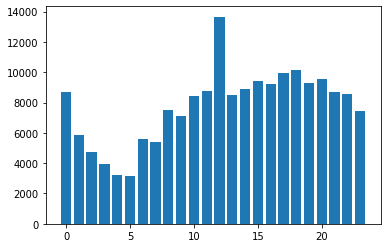

In [34]:
crime_freq_by_hour = crimes["TIME OCC"].str[:2].astype("int").value_counts()
plt.bar(x=crime_freq_by_hour.index, height=crime_freq_by_hour.values);

We see that, indeed, most crimes occur at hour 12 (i.e. 12:00–12:59 p.m.). The least number of crimes occur very at hour 5. The early mornings (from hour 2 to 5) generally have lower crime rates than other times.

## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

In [36]:
peak_night_crime_location = crimes[
    (crimes["TIME OCC"].astype("int") >= 2200) | 
    (crimes["TIME OCC"].astype("int") <= 359)]["AREA NAME"].value_counts().index[0]
peak_night_crime_location

'Central'